In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sklearn
import os
import numpy as np
from load_quilt_data import load_data
from pylab import *
from sklearn.cluster import MeanShift, estimate_bandwidth, DBSCAN
from itertools import cycle

Fragments already downloaded


In [4]:
node = 'pointwise_clusters_test'
typ = 'pointwiseclusters'

X, Y1, Y2, meta = load_data(node, typ)

In [5]:
cluster_IDs = [8, 9, 10]

In [6]:
new_x = []
new_y = []
for x,y in zip(X[0], Y1[0]):
    if y in cluster_IDs:
        new_x.append(x)
        new_y.append(y)


In [7]:
# Compute clustering with MeanShift
def db_clustering(x):

    # The following bandwidth can be automatically detected using
    # bandwidth = estimate_bandwidth(np.asarray(x), quantile=0.2)
    # bandwidth = 500
    y_pred = DBSCAN().fit_predict(x)

    return(y_pred)


In [8]:
y_pred = db_clustering(X[0])
cluster_IDs_ms = np.unique(y_pred).tolist()


C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


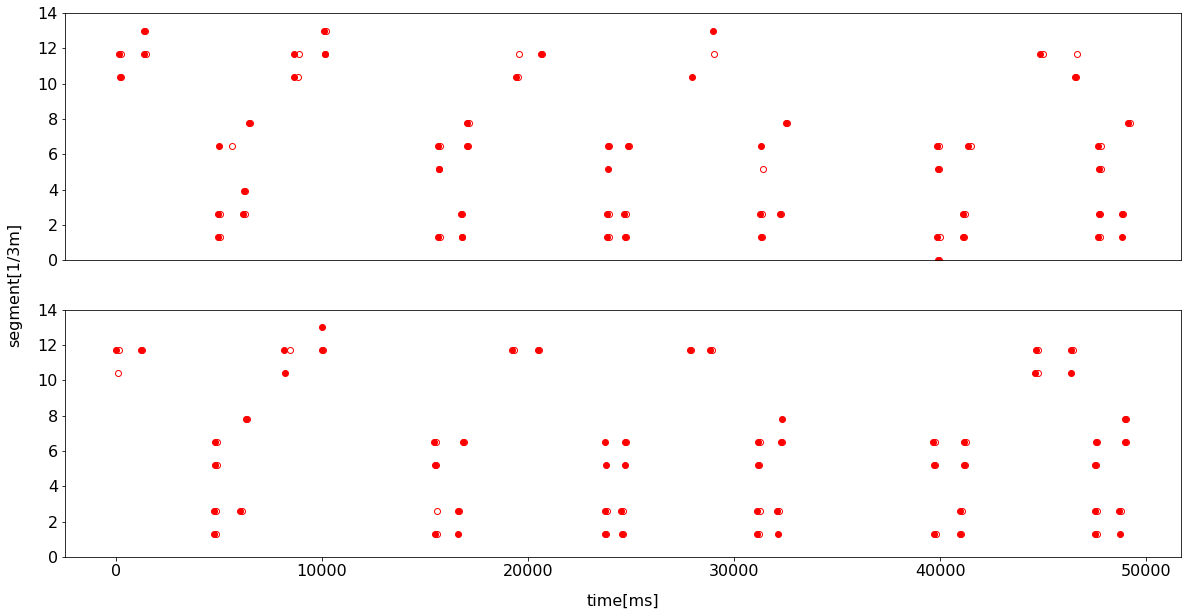

In [17]:
plot_sensor_data(X[0], y_pred, 0)

C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


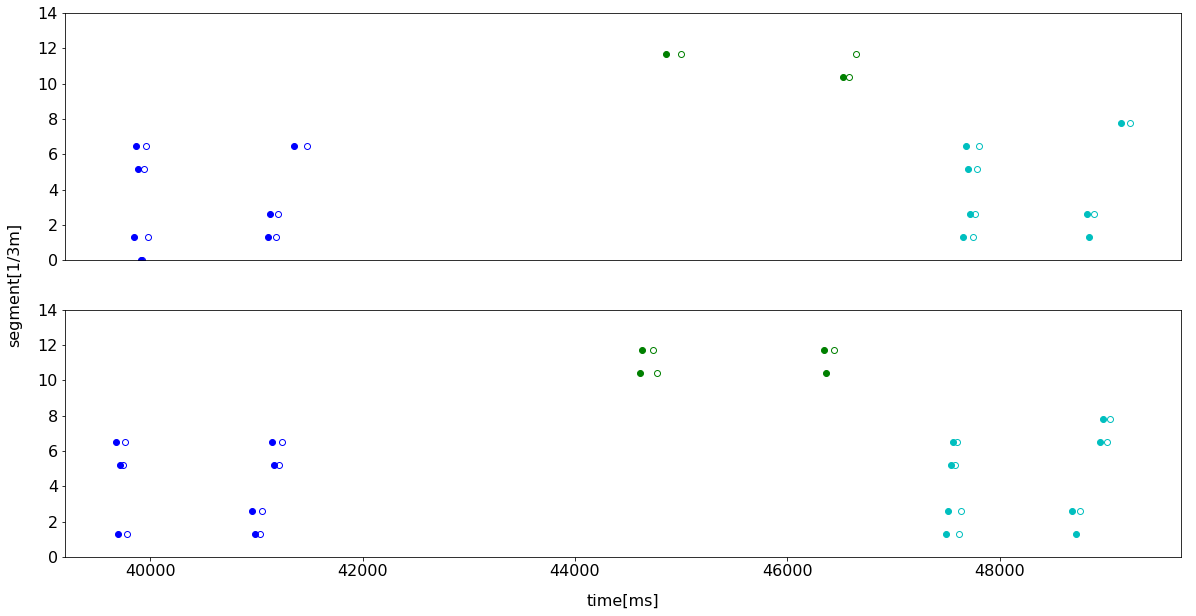

In [14]:
plot_sensor_data(X[0][len(new_x):],Y1[0][len(new_x):], cluster_IDs)

In [1]:
# Plot the sensor data (segment against time) according to push/release and sensor stripe
def plot_sensor_data(x_data, y1, cluster_IDs):
    
    colors = cycle('bgcr')

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111) 
    
    #subplots
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
    
    #plot according to push/release and which sensor
    i = 0
    for x, y in zip(x_data, y1):
        if i != 0:
            if y != y1[i-1]:
                color = next(colors)
        else:
            color = 'r'
        if cluster_IDs != 0:

            if y in cluster_IDs:

                if x[1] == 0:
                    if x[3] == 0:
                        ax1.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                    else:
                        ax1.plot(x[0], x[2], 'bo', marker = 'o', color = color)
                else: 
                    if x[3] == 0:
                        ax2.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                    else:
                        ax2.plot(x[0], x[2], 'bo', marker = 'o', color = color)
        else:
            if x[1] == 0:
                if x[3] == 0:
                    ax1.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                else:
                    ax1.plot(x[0], x[2], 'bo', marker = 'o', color = color)
            else: 
                if x[3] == 0:
                    ax2.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                else:
                    ax2.plot(x[0], x[2], 'bo', marker = 'o', color = color)
        i += 1
        
    # turn off spines and labels of overlayed plot (for the shared axes)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    ax1.tick_params(labelcolor='w', top='off', bottom='off', right='off', labelbottom = 'off',  labelsize = 16)
    ax1.tick_params(labelcolor='black', left = 'on')
    ax1.set_ylim([0, 16])
    ax2.set_ylim([0, 16])
    ax2.tick_params(labelsize = 16)
    # Set common labels
    ax.set_xlabel('time[ms]', size = 16, labelpad=20)
    ax.set_ylabel('segment[1/3m]', size = 16, labelpad=20)

    #plt.suptitle('Prediction: '+str(wrong_y_pred)+' True value: '+str(y_true)+ ('\n0= Car in, 1= Car out, 2= Motorcycle, 3= Pedestrian'), va = 'bottom')
    plt.show()

In [ ]:
#Look for unique clusters in foundclusters
unique_pos = []
unique_clusters = []
for cl_position, foundcluster in zip(cl_positions, foundclusters):
    if foundclusters.count(foundcluster) == 1:
        unique_pos.append(cl_position)
        unique_clusters.append(foundcluster)

In [310]:
#How long are clusters in Xc?
lens = []
for cluster, output in zip(Xc, Y2c):
    if output != 0:
        #print(len(cluster))
        lens.append(len(cluster))
lens.sort()
print(lens[1:1000])
print(min(lens))

[8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 